# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use our saved churn data from week 2 with machine learning to predict if customers will churn or not, similar to what we did in the FTE:

- break up data into features and targets
- split data into train and test sets
- use at least one ML model to fit to the training data
- evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"
- plot a confusion matrix
- write something describing how the ML algorithm could be used in a business setting
- Write a short summary of what you did with the overall process - describe any important EDA findings, data cleaning and preparation, modeling, and evaluation in your summary.

*Optional*: For an addition challenge, try the following:
- fit more ML models and compare their scores
- optimize the hyperparameters of your models
- examine more metrics such as the classification report and ROC/AUC
- plot the distribution of the probability predictions (from the `predict_proba()` function from our model) for each class (1s and 0s)

### DS process status

Here is our data science process, and where we are (#4):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Week 1 - EDA and visualization.

**3. Data preparation**

Last week - cleaning and feature engineering.


**4. Modeling**

This week.
Fit a ML model to the data.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [5]:
df = pd.read_csv('clean_churn_data.csv', index_col='Unnamed: 0')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_total_chg_ratio
0,7590-VHVEG,1,0,12,1,29.85,29.85,0,1.000000
1,5575-GNVDE,34,1,1,2,56.95,1889.50,0,0.030140
2,3668-QPYBK,2,1,12,2,53.85,108.15,1,0.497920
3,7795-CFOCW,45,0,1,3,42.30,1840.75,0,0.022980
4,9237-HQITU,2,1,12,1,70.70,151.65,1,0.466205
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,2,84.80,1990.50,0,0.042602
7039,2234-XADUH,72,1,1,4,103.20,7362.90,0,0.014016
7040,4801-JZAZL,11,0,12,1,29.60,346.45,0,0.085438
7041,8361-LTMKD,4,1,12,2,74.40,306.60,1,0.242661


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7043 non-null   object 
 1   tenure                   7043 non-null   int64  
 2   PhoneService             7043 non-null   int64  
 3   Contract                 7043 non-null   int64  
 4   PaymentMethod            7043 non-null   int64  
 5   MonthlyCharges           7043 non-null   float64
 6   TotalCharges             7043 non-null   float64
 7   Churn                    7043 non-null   int64  
 8   monthly_total_chg_ratio  7043 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 550.2+ KB


In [20]:
#break up data into features and targets
features = df.drop(['customerID', 'Churn'], axis=1)
print(features)
targets = df['Churn']
print(targets)


      tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
0          1             0        12              1           29.85   
1         34             1         1              2           56.95   
2          2             1        12              2           53.85   
3         45             0         1              3           42.30   
4          2             1        12              1           70.70   
...      ...           ...       ...            ...             ...   
7038      24             1         1              2           84.80   
7039      72             1         1              4          103.20   
7040      11             0        12              1           29.60   
7041       4             1        12              2           74.40   
7042      66             1         2              3          105.65   

      TotalCharges  monthly_total_chg_ratio  
0            29.85                 1.000000  
1          1889.50                 0.030140  
2        

In [21]:
#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)
print("x_train")
print(x_train)
print("x_test")
print(x_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)
#default size is 25% test size

x_train
      tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
6661      72             0         2              4           53.65   
4811       4             1        12              2           46.00   
2193      56             1         1              2           21.20   
1904      56             1        12              1           94.45   
6667       9             1        12              1           79.55   
...      ...           ...       ...            ...             ...   
4250      63             1         1              4          104.50   
1488       1             1        12              2           51.25   
6303      71             1         2              1          109.25   
2710      24             1         1              4           20.40   
5639       6             1        12              2           20.65   

      TotalCharges  monthly_total_chg_ratio  
6661       3784.00                 0.014178  
4811        193.60                 0.237603  
2

In [22]:
#use at least one ML model to fit to the training data
#create the model first, then fit it to training data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

**5. Evaluation**

This week.
Check the performance of our models and evaluate how it fits our goals from step 1.

In [30]:
#evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"
x=df['Churn'].value_counts(normalize=True)
x

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [32]:
#evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"
# so, "No Information Rate" is 73.5% no-churn
train_acc = lr_model.score(x_train, y_train)
test_acc = lr_model.score(x_test, y_test)
print(train_acc)
print(test_acc)

0.7966679288148428
0.7932992617830777


In [34]:
#evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"
# so, the train and test sets have pretty similar accuracy scores. 
# Little/no adjustment is needed to counteract high bias or high variance
print(f'No Information Rate: {x[0]} \nTrain Accuracy: {train_acc} \nTest Accuracy: {test_acc}')

No Information Rate: 0.7346301292063041 
Train Accuracy: 0.7966679288148428 
Test Accuracy: 0.7932992617830777


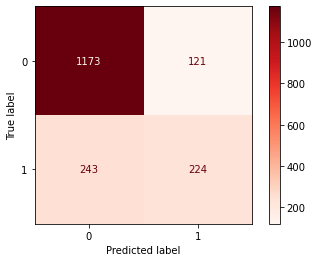

In [39]:
#plot a confusion matrix
plot_confusion_matrix(lr_model, x_test, y_test, cmap='Reds')

**6. Deployment**

This week.
Describe how the model might be deployed and used at the business. Will there be an API that customer service reps can use when customers call? Should there be a system where a report gets sent to someone in customer retention or marketing with at-risk customers? We should really think about these things in the first step, although we can consider them here this time.

# 6. Deployment

**Write a small description of how we might use this ML algorithm in a business setting:**
This ML algorithm used with this specific dataset could be used in a business setting to assist corporations or smaller businesses with cost predictions. Employee churn means former employees are leaving the company and that means new employees need hired. New employees are significantly more expensive than employees which are experienced, due to the extensive training involved in bringing a new employee into a company. Having a model that could predict the amount of employee churn is useful because a business can now more accurately estimate the cost it takes to run and sustain itself. 

# Summary

**Write a short summary of what you did with the overall process - describe any important EDA findings, data cleaning and preparation, modeling, and evaluation in your summary:**
In this week's assignment, I successfully created a linear regression model of a business employee churn dataset, where all numeric data were the 'features' and the employee churn was the 'target'. Since all EDA findings, data cleaning and preparation was completed before this assignment, the only steps were the modeling and evaluation. I found that the model had a similar accuracy between the train and test datasets, so no adjustment was needed to correct for high bias or high variance. This model was also more successful at making predictions than the 'No Information Rate' which was 73.5% accurate. The model exceeded that accuracy with a rate of ~79%. I plotted a confusion matrix which showed the majority of the datapoints as true negatives which shows the model was successful in predicting outcomes. 

Thank you! All the best, Jeremy